## 1. Encàrrec de productora
<p><img src="https://cdn.pixabay.com/photo/2018/10/09/00/21/netflix-3733812_960_720.jpg" alt="foto pelicula"></p>
<p>Una de les productores més importants del mercat ens ha demant fer un anàlisis històric abans d'invertir en una nova pel·lìcula.</p>
<p>Haurem de donar repsposta a diferents preguntes com: </p>

*   La popularitat de les pel·lícules han disminuït durant els anys
*   Quins gènere tenen millor valoracions
*   Les pel·lícules que ofereixen un millor benefici proporcional son les de més pressupost
*   Quins gèneres ofereixen més benefici.
*   Proposa una idea de pel·lìcula
*   Surt a compte fer una segona part?

<p>Per realitzar aquest anàlisis disposem dels següents set de dades:.</p>

*  movies.p: pel·lìcula data i espectadors
*   movie_to_genres.p: gènere de cada pel·lìcula
*   financial.p: dades econòmiques de cada pel·lìcula
*   sequels.p: relació de les pelìcules i les seves sequeles.
*   ratings.p: valoració de les pel·lìcules






---



## Anàlisis de la popularitat

L'empresa creu que durant els darrers anys les pel·lícules tenen menys popularitat. Vol que ho comprovem gràficament

Primer de tot importarem el nostre dataset i analitzarem les seves dades bàsiques ¿Quina es la popularitat mitja i la més alta?

In [389]:
import pandas as pd
df_movies = pd.read_pickle('movies.p')

df_movies.head()


,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17


In [390]:
df_movies['popularity'].describe()

,popularity
count,4803.000000
mean,21.492301
std,31.816650
min,0.000000
25%,4.668070
50%,12.921594
75%,28.313505
max,875.581305


In [391]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4803 non-null   int64  
 1   title         4803 non-null   object 
 2   popularity    4803 non-null   float64
 3   release_date  4802 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 150.2+ KB


Necessitem treballar amb el camp release_date com a datatime, així que transformem la columna i ho comprovem. ¿De quin fins a quin any tenim dades?

In [392]:
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            4803 non-null   int64         
 1   title         4803 non-null   object        
 2   popularity    4803 non-null   float64       
 3   release_date  4802 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 150.2+ KB


L'empresa considera que els gustos han canviat molt durant els últims anys, aixi que nomès l'interessen les dades desde el 2010. ¿De cuàntes dades disposem? ¿De cuàntes dades disposem?

In [393]:
df_movies = df_movies[df_movies['release_date'].dt.year>=2010]

df_movies['release_date'].describe()




,release_date
count,1446
mean,2013-04-08 07:00:14.937759232
min,2010-01-01 00:00:00
25%,2011-09-03 12:00:00
50%,2013-04-22 12:00:00
75%,2014-10-31 00:00:00
max,2017-02-03 00:00:00


Pasem a mostrar la linea temporal de com ha variat la popularitat durant els darrers anys.

<ipython-input-394-51c0a896e5f6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['release_year'] = df_movies['release_date'].dt.year


<Axes: xlabel='release_year'>

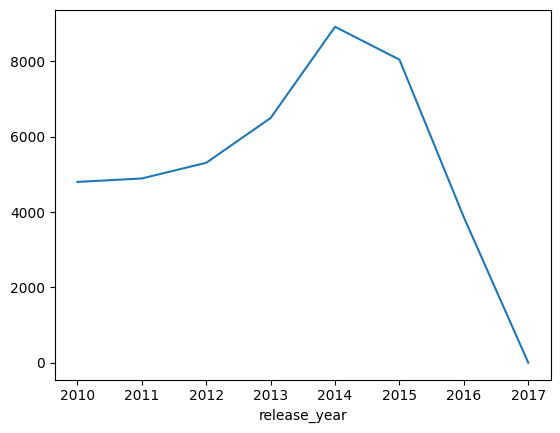

In [394]:
import matplotlib.pyplot as plt

df_movies['release_year'] = df_movies['release_date'].dt.year

df_grouped = df_movies.groupby('release_year')['popularity'].sum()
df_grouped.plot()

<Axes: xlabel='release_year'>

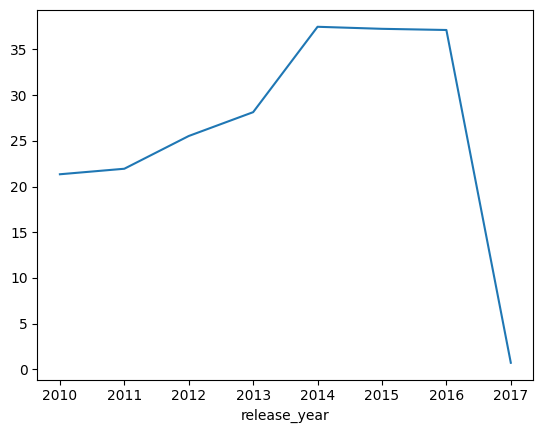

In [395]:

df_grouped = df_movies.groupby('release_year')['popularity'].mean()
df_grouped.plot()

¿Què passa al 2017, quin és el motiu? Igualment aquesta devadalla és molt extranya, és probalble a que en alguns anys s'hagin realitzat moltes més pel·lícules i que per aquesta raó la mitja sigui molt més alta. Anem a fer el mateix procediment amb la mitja

In [396]:


df_movies2017 = df_movies[df_movies['release_date'].dt.year>=2017]
df_movies2017.head()

,id,title,popularity,release_date,release_year
3019,426469,Growing Up Smith,0.71087,2017-02-03,2017


### Resposta 1. Estan perdent popularitat les pel·lìcules?

Si no tenim en compte 2017, degut a que no tenim pràcticament dades de pel·lícules en aquest any, a la resta d'anys de mitja no es veu que la popularitat hagi disminuit, tot el contrari.



---



## Anàlisis del rating

Un cop decidit que val la pena realitzar una pel·lìcula, haurem de valorar de quina gènere val la pena en funció de la seva valoració. Primer de tot mostrarem la puntuació mitja de les pel·lícules i les 10 pel·lìcules més valorades. Mostra únicament el nom i el títol de la pel·lìcula ( i el index que surt per defecte)

In [397]:
df_rating = pd.read_pickle('ratings.p')

df_rating.head()

,id,vote_average,vote_count
0,19995,7.2,11800.0
1,285,6.9,4500.0
2,206647,6.3,4466.0
3,49026,7.6,9106.0
4,49529,6.1,2124.0


In [398]:
df_movies = df_movies.merge(df_rating, on= 'id')

In [399]:
df_movies['vote_average'].mean()

df_moviesTop = df_movies[(df_movies['popularity']>60) & (df_movies['vote_count']>2000)]

df_moviesTop.sort_values(by='vote_average',ascending= False)[0:9]

,id,title,popularity,release_date,release_year,vote_average,vote_count
1197,244786,Whiplash,192.528841,2014-10-10,2014,8.3,4254.0
955,264644,Room,66.113340,2015-10-16,2015,8.1,2757.0
9,27205,Inception,167.583710,2010-07-14,2010,8.1,13752.0
1306,157336,Interstellar,724.247784,2014-11-05,2014,8.1,10867.0
431,205596,The Imitation Game,145.364591,2014-11-14,2014,8.0,5723.0
113,150540,Inside Out,128.655964,2015-06-09,2015,8.0,6560.0
881,120467,The Grand Budapest Hotel,74.417456,2014-02-26,2014,8.0,4519.0
1412,76203,12 Years a Slave,95.922900,2013-10-18,2013,7.9,3674.0
734,118340,Guardians of the Galaxy,481.098624,2014-07-30,2014,7.9,9742.0


De les pel·lìcules que ens interessa pel nostre anàlisis ( més de 60k de popularitat i més de 2000 valoracions) obtindrem el seu gènere per mostra gràficament la mitja per gènere.

In [400]:
df_moviesTop.shape

(138, 7)

In [401]:
df_genre = pd.read_pickle('movie_to_genres.p')

df_moviesTop = df_moviesTop.merge(df_genre,left_on='id',right_on='movie_id')

df_moviesTop.head()

,id,title,popularity,release_date,release_year,vote_average,vote_count,movie_id,genre
0,76757,Jupiter Ascending,85.36908,2015-02-04,2015,5.2,2768.0,76757,Adventure
1,76757,Jupiter Ascending,85.36908,2015-02-04,2015,5.2,2768.0,76757,Fantasy
2,76757,Jupiter Ascending,85.36908,2015-02-04,2015,5.2,2768.0,76757,Action
3,76757,Jupiter Ascending,85.36908,2015-02-04,2015,5.2,2768.0,76757,Science Fiction
4,27205,Inception,167.58371,2010-07-14,2010,8.1,13752.0,27205,Mystery


In [402]:
print(df_moviesTop.groupby('genre')['vote_average'].mean().sort_values(ascending=False)[0:3])

genre
History    7.950000
Western    7.566667
Drama      7.238636
Name: vote_average, dtype: float64


¿Quin és el motiu que els tamany dels dataset siguin diferents?

¿Quins son el tres gèneres amb millor valoració?



---



## Anàlisis econòmic

Observa el dataset financial i els seus estadìstics bàsics. ¿Quin és el pressupost i els ingressos promig?¿Sembla rentable fer una pel·lìcula?

In [403]:
df_financials = pd.read_pickle('financials.p')
df_financials.describe()

,id,budget,revenue
count,3229.000000,3.229000e+03,3.229000e+03
mean,44780.705791,4.065444e+07,1.212430e+08
std,74609.434723,4.439674e+07,1.863029e+08
min,5.000000,1.000000e+00,5.000000e+00
25%,4958.000000,1.050000e+07,1.700000e+07
50%,11451.000000,2.500000e+07,5.518472e+07
75%,45272.000000,5.500000e+07,1.462920e+08
max,417859.000000,3.800000e+08,2.787965e+09


In [404]:
df_financials.head()

,id,budget,revenue
0,19995,237000000,2.787965e+09
1,285,300000000,9.610000e+08
2,206647,245000000,8.806746e+08
3,49026,250000000,1.084939e+09
4,49529,260000000,2.841391e+08


Mostra la distribució (histograma) del pressupost de les pel·lícules. ¿La majoria de pel·lìcules son de baix o alt pressupost?

<Axes: >

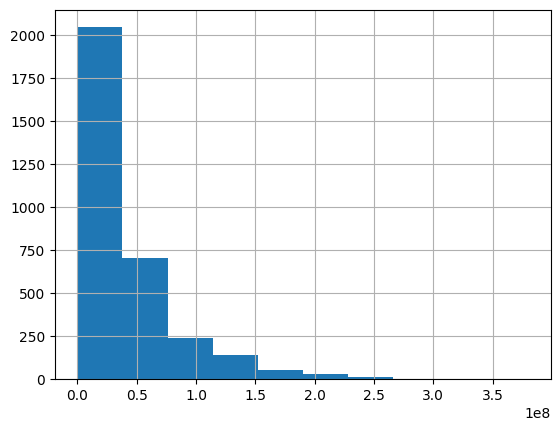

In [405]:
df_financials['budget'].hist()

Más de la mitad de peliculas tienen un presupuesto entre 0 y 50 millones.

Cierto

Volem mostrar ( nom inclòs) les pel·lìcules les 5 pel·lícules mès profitosses i les 5 més deficitàries de la historia.

In [406]:
df_moviesTop = df_movies[(df_movies['popularity']>60) & (df_movies['vote_count']>2000)]
df_financials['profit'] = df_financials['revenue']- df_financials['budget']
df_financials['pro_profit'] = df_financials['profit']/df_financials['budget']

df_financials= df_financials.merge(df_moviesTop[['id','title','vote_average']], on='id', how='inner')
df_financials.sort_values(by='pro_profit',ascending=False)

,id,budget,revenue,profit,pro_profit,title,vote_average
134,222935,12000000,3.071668e+08,2.951668e+08,24.597236,The Fault in Our Stars,7.6
131,44214,13000000,3.278037e+08,3.148037e+08,24.215672,Black Swan,7.3
129,205596,14000000,2.335557e+08,2.195557e+08,15.682551,The Imitation Game,8.0
95,211672,74000000,1.156731e+09,1.082731e+09,14.631499,Minions,6.4
115,216015,40000000,5.710061e+08,5.310061e+08,13.275153,Fifty Shades of Grey,5.2
...,...,...,...,...,...,...,...
11,44833,209000000,3.030255e+08,9.402548e+07,0.449883,Battleship,5.5
81,83542,102000000,1.304829e+08,2.848287e+07,0.279244,Cloud Atlas,6.6
39,158852,190000000,2.091543e+08,1.915432e+07,0.100812,Tomorrowland,6.2
28,76757,176000003,1.839877e+08,7.987720e+06,0.045385,Jupiter Ascending,5.2


In [407]:
bins = [0, 5, 7, 8, 10]
names = ['mala', 'buena', 'muy_buena', 'excelente']

df_financials['vote_category'] = pd.cut(df_financials['vote_average'], bins, labels=names)

df_financials.head()

,id,budget,revenue,profit,pro_profit,title,vote_average,vote_category
0,206647,245000000,8.806746e+08,6.356746e+08,2.594590,Spectre,6.3,buena
1,49026,250000000,1.084939e+09,8.349391e+08,3.339756,The Dark Knight Rises,7.6,muy_buena
2,99861,280000000,1.405404e+09,1.125404e+09,4.019299,Avengers: Age of Ultron,7.3,muy_buena
3,209112,250000000,8.732602e+08,6.232602e+08,2.493041,Batman v Superman: Dawn of Justice,5.7,buena
4,49521,225000000,6.628455e+08,4.378455e+08,1.945980,Man of Steel,6.5,buena


No tenim clar si és convenient realitzar una pel·lícula d'alt o baix pressupost, per aquesta raó anem a comparar si existeix una correlació entre el pressupost i el pro_profit guanyat. Podriem mostra una matriu de correlació, pero preferim extreu conclusions visuals a través d'un scatter plot. Et dona la sensació que si s'inverteixen més diner la proporció de benefici és més gran?

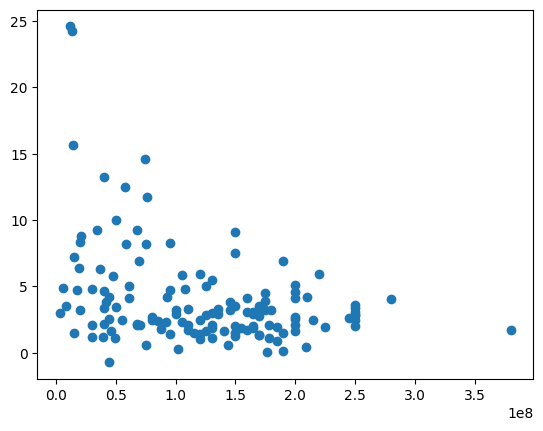

In [408]:
plt.scatter(df_financials['budget'],df_financials['pro_profit'])

<Axes: xlabel='budget', ylabel='profit'>

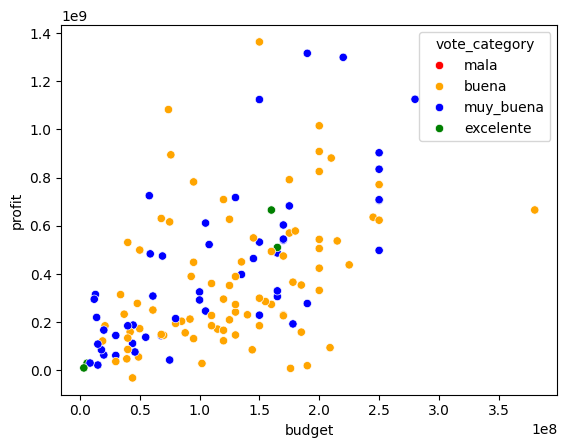

In [409]:
import seaborn as sns
sns.scatterplot(data=df_financials,x='budget',y='profit',hue='vote_category', palette=dict(mala="red", buena="orange", muy_buena="blue", excelente="green"))

In [410]:
df_financials[df_financials['vote_category']=='excelente'].sort_values(by='profit')

,id,budget,revenue,profit,pro_profit,title,vote_average,vote_category
136,244786,3300000,13092000.0,9792000.0,2.967273,Whiplash,8.3,excelente
133,264644,6000000,35401758.0,29401758.0,4.900293,Room,8.1,excelente
44,157336,165000000,675120017.0,510120017.0,3.091636,Interstellar,8.1,excelente
45,27205,160000000,825532764.0,665532764.0,4.159580,Inception,8.1,excelente


En la mateixa gràfica anem incloure les valoracions de les pel·lìcules, aparentment imaginem que les pel·lìcules que han tingut bona acollida son les que mé beneficis han aportat. Veient la gràfica creada sembla certa aquesta afirmaciò?

Finalment per determinar quina tipus de pel·lìcula realitzarem visualitzarem els gèneres que ofereixen millor relació en quant a proporció de benefici. Mirant l'apartat anterior i aquest, quin seria els gèneres de la teva pel·lìcula? Fica imagina i proposa una temàtica.

In [411]:
df_genre = pd.read_pickle('movie_to_genres.p')
df_genre.head()

,movie_id,genre
0,5,Crime
1,5,Comedy
2,11,Science Fiction
3,11,Action
4,11,Adventure


In [412]:
df_financials = df_financials.merge(df_genre,left_on='id',right_on='movie_id')
df_financials.groupby('genre')['profit'].mean().sort_values(ascending=False)


,profit
genre,
Family,5.668885e+08
Animation,5.559884e+08
Adventure,5.072935e+08
Fantasy,4.552701e+08
Action,4.188466e+08
Science Fiction,4.098021e+08
Romance,3.917379e+08
Comedy,3.765078e+08
Thriller,3.409304e+08


In [418]:
df_financials.sort_values(by='pro_profit',ascending=False)[0:10]

,id,budget,revenue,profit,pro_profit,title,vote_average,vote_category,movie_id,genre
415,222935,12000000,3.071668e+08,2.951668e+08,24.597236,The Fault in Our Stars,7.6,muy_buena,222935,Drama
414,222935,12000000,3.071668e+08,2.951668e+08,24.597236,The Fault in Our Stars,7.6,muy_buena,222935,Romance
408,44214,13000000,3.278037e+08,3.148037e+08,24.215672,Black Swan,7.3,muy_buena,44214,Drama
409,44214,13000000,3.278037e+08,3.148037e+08,24.215672,Black Swan,7.3,muy_buena,44214,Thriller
402,205596,14000000,2.335557e+08,2.195557e+08,15.682551,The Imitation Game,8.0,muy_buena,205596,Thriller
403,205596,14000000,2.335557e+08,2.195557e+08,15.682551,The Imitation Game,8.0,muy_buena,205596,War
404,205596,14000000,2.335557e+08,2.195557e+08,15.682551,The Imitation Game,8.0,muy_buena,205596,History
405,205596,14000000,2.335557e+08,2.195557e+08,15.682551,The Imitation Game,8.0,muy_buena,205596,Drama
315,211672,74000000,1.156731e+09,1.082731e+09,14.631499,Minions,6.4,buena,211672,Family
314,211672,74000000,1.156731e+09,1.082731e+09,14.631499,Minions,6.4,buena,211672,Animation


## 'Segundas partes no son buenas'

La nostra pel·lìcula ha tingut molt bona acollida tant que estem valorant la possibilitat de realitzar una segona part. Existeix la idea de que les seqüeles son sempre pitjors. Mostra la diferència promig entre les pel·lìcules i les seves seqüeles i les 5 pel·lìcules on les seves continuacions han millorat mès.

In [414]:
# mostrem dataset

# Elimina files que no tenen sequel


# comprova que no hi ha NA


# join amb movies per obtenir noms de original i de sequels



# simplifiquem per quedar-nos únicament amb id_original, titol_original, id_sequel, titol_sequel



In [415]:
# Merge per duplicat per obentenir les valoracions


# creem nova columna amb la diferenta valoracació sequel i original


#mostre mitja



In [416]:
# Mostra les 5 millor sequeles en comparació a la seva predecesora



---



## UPGRADE - CASTING


A partir del dataset actors, fes l'anàlisis que consideris adient per escollir els nostres actors/actrius